In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('advertising.csv')

In [4]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [5]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
data['City'].nunique()

969

In [9]:
data['Country'].nunique()

237

C:\Users\majum\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Male', ylabel='count'>

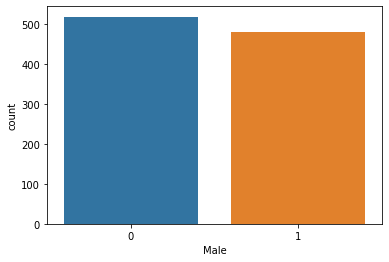

In [10]:
sns.countplot(data['Male'])

C:\Users\majum\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

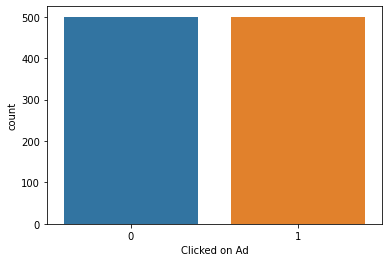

In [11]:
sns.countplot(data['Clicked on Ad'])

In [12]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


<AxesSubplot:>

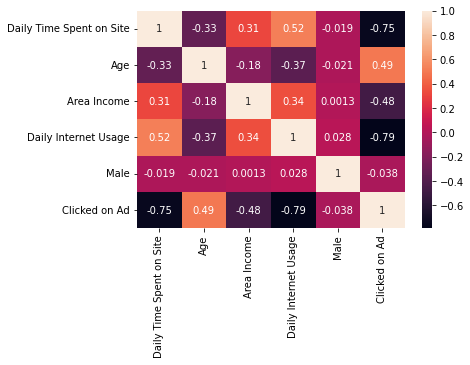

In [14]:
sns.heatmap(data.corr(),annot=True)

C:\Users\majum\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


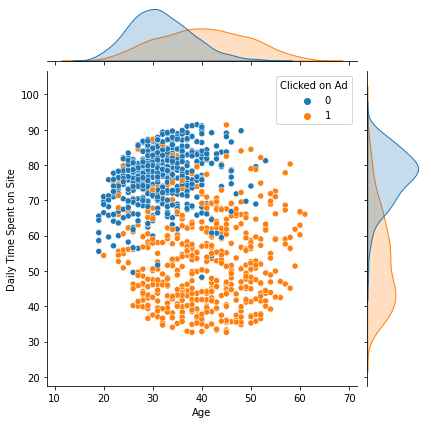

In [16]:
sns.jointplot('Age','Daily Time Spent on Site',data=data,hue='Clicked on Ad')

C:\Users\majum\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


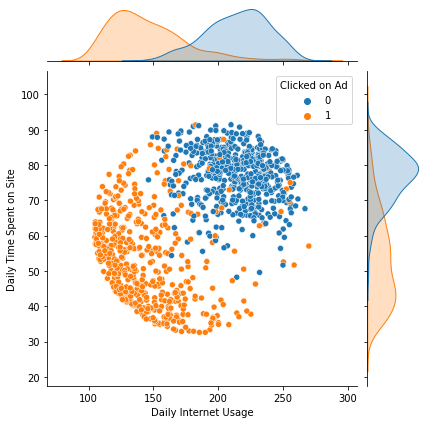

In [17]:
sns.jointplot(data['Daily Internet Usage'],data['Daily Time Spent on Site'],hue=data['Clicked on Ad'])

C:\Users\majum\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


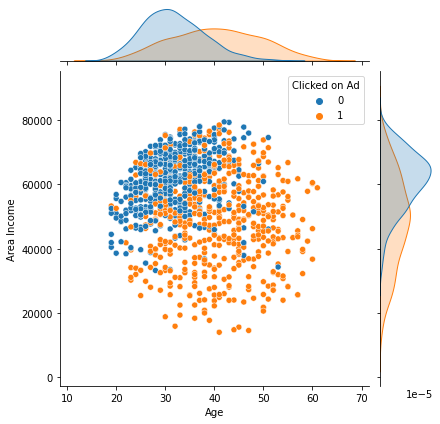

In [19]:
sns.jointplot(data['Age'],data['Area Income'],hue=data['Clicked on Ad'])

C:\Users\majum\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


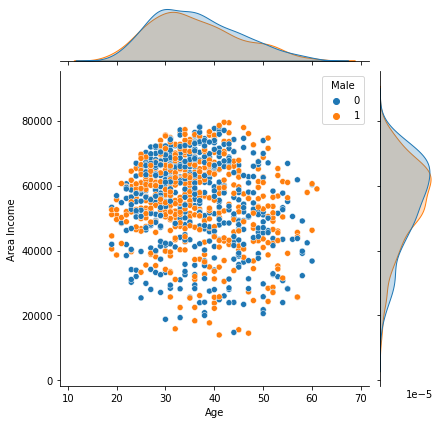

In [20]:
sns.jointplot(data['Age'],data['Area Income'],hue=data['Male'])

In [23]:
X = data[['Daily Internet Usage','Daily Time Spent on Site','Age']]
y = data['Clicked on Ad']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [32]:
# Fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [34]:
# Evaluate the mode
predicted = logmodel.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test,predicted))

Confusion matrix
[[170   5]
 [ 11 144]]


In [35]:
print('Accuracy',accuracy_score(y_test,predicted))
print("Precision",precision_score(y_test,predicted))
print("Recall",recall_score(y_test,predicted))

Accuracy 0.9515151515151515
Precision 0.9664429530201343
Recall 0.9290322580645162


In [45]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=102)
# Fit the model
#logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# Evaluate the mode
predicted = logmodel.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test,predicted))
print('Accuracy',accuracy_score(y_test,predicted))
print("Precision",precision_score(y_test,predicted))
print("Recall",recall_score(y_test,predicted))

Confusion matrix
[[149   6]
 [  7 168]]
Accuracy 0.9606060606060606
Precision 0.9655172413793104
Recall 0.96


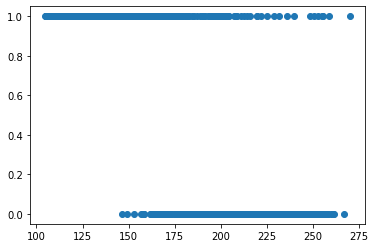

In [46]:
import matplotlib.pyplot as plt
plt.scatter(data['Daily Internet Usage'],data['Clicked on Ad'])

In [50]:
print(logmodel.class_weight)

None


In [51]:
logmodel.coef_

array([[-0.05715214, -0.14080439,  0.10621767]])

In [52]:
logmodel.intercept_

array([16.38377664])

In [55]:
new_data = [[100,60,20]]
import numpy as np
new_data = np.array(new_data)

In [65]:
output=logmodel.predict([[250,80,60]])

C:\Users\majum\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
if output[0]==0:
    print('NO')
else:
    print('Yes')

NO


In [68]:
output[0]

0